# Ifood Exploratory and Descriptive Analysis Challenge

This challenge was created by the [Statistics course from Renata Biaggi](www.renatabiaggi.com).

[Ifood](https://institucional.ifood.com.br/ifood/) is a Brazilian Company that connects customers, restaurants and delivery people.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# versions packages
print('Pandas Version -> %s' % pd.__version__)
print('Numpy Version -> %s' % np.__version__)
print('Seaborn Version -> %s' % sns.__version__)

Pandas Version -> 1.3.4
Numpy Version -> 1.20.3
Seaborn Version -> 0.11.2


## Exploring the data

The dataset consists of data from customers of Ifood company.

### Open dataset

In [55]:
df_ifood = pd.read_csv('./mkt_data.csv')
df_ifood.head(5)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [56]:
df_ifood.shape

(2205, 44)

The dataset has 2205 rows and 44 columns.

### What are the types of variables in this dataset?

In [57]:
df_ifood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

The numeric variables are 'int64' or 'float64' types columns. The categoric variables are 'object' type columns.

### Are there duplicate rows in the dataset?

In [58]:
df_ifood.duplicated().sum()

0

There are no duplicate rows.

### Are there null data in the dataset?

In [59]:
df_ifood.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

There are null data in columns: 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master' and 'education_PhD'. 

They are null values because they do not have the described characteristic. 

Therefore, it is possible to transform them into Boolean columns with value of 0 for those that do not have the characteristic.

In [60]:
null_columns = ["marital_Divorced" 
, "marital_Married"
, "marital_Single"  
, "marital_Together"       
, "marital_Widow"           
, "education_2n Cycle"      
, "education_Basic"       
, "education_Graduation"  
, "education_Master"      
, "education_PhD"]

In [61]:
for item in null_columns:
  df_ifood[item] = np.where(df_ifood[item].isnull(), 0, 1) # if null value replace it with 0, if not 1

### What a mean, median, 25th percentile, 75th percentile, minimum and maximum of each of the numeric columns?

In [62]:
numerics_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = df_ifood.select_dtypes(include=numerics_types).columns
df_ifood[numeric_columns].describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,0.948753,562.764626
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,0.749231,575.936911
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,0.000000,56.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,1.000000,343.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,1.000000,964.000000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,3.000000,2491.000000


## What can we analyze from this dataset?

Now, let's analyze Ifood customers profile in this dataset.

### Customers income analysis

In [63]:
df_ifood["Income"].max()

113734.0

The biggest income is 113734.

<AxesSubplot:>

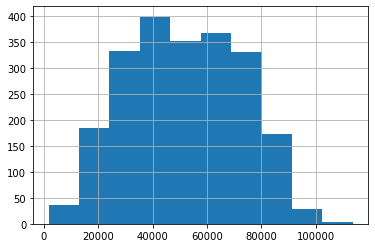

In [64]:
df_ifood["Income"].hist()

c:\Users\carla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

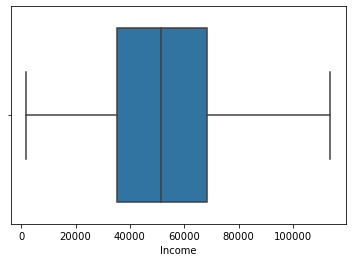

In [65]:
sns.boxplot(df_ifood["Income"])

Incomes are proportionally distributed in the dataset. Few people have a low income and few people have a high income. Apparently, there are no outliers in the dataset.

## Customers education degree

<AxesSubplot:xlabel='education_level', ylabel='count'>

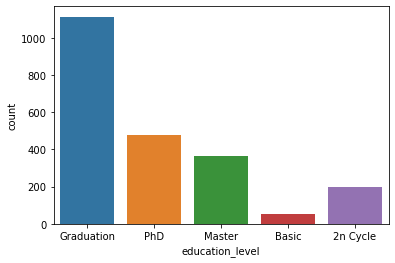

In [66]:
sns.countplot(x=df_ifood["education_level"])

Customers Ifood has at least bachelor’s degree.

### Customers marital status

<AxesSubplot:xlabel='marital_status', ylabel='count'>

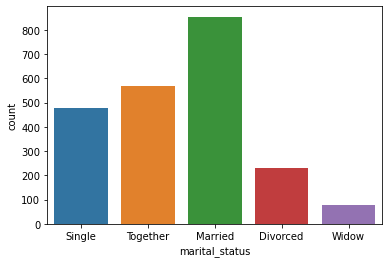

In [67]:
sns.countplot(x=df_ifood["marital_status"])

## How are these data related?

<AxesSubplot:xlabel='marital_status', ylabel='kids'>

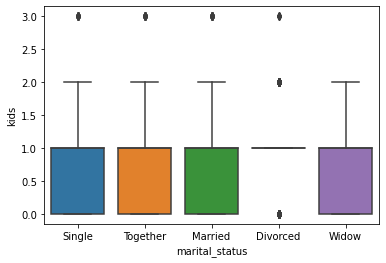

In [68]:
sns.boxplot(x='marital_status', y='kids', data=df_ifood)

In [69]:
df_ifood.groupby("marital_status")["kids"].mean()

marital_status
Divorced    1.008696
Married     0.967213
Single      0.859539
Together    0.980634
Widow       0.881579
Name: kids, dtype: float64

In [70]:
df_ifood.groupby("marital_status")["kids"].median()

marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64

The number of children among all is close, but analyzing only the average, single customers have fewer children.

### Do people spend more when they have kids?

<AxesSubplot:xlabel='kids', ylabel='expenses'>

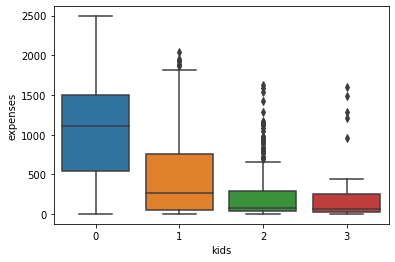

In [71]:
sns.boxplot(x='kids', y='expenses', data=df_ifood)

People with more children expenses less than people without children.

### What is expended by marital status?

<AxesSubplot:xlabel='marital_status', ylabel='expenses'>

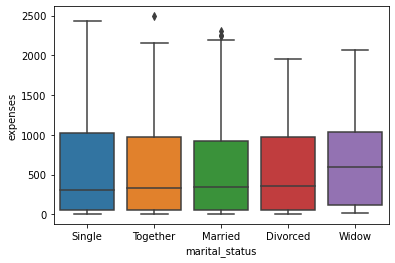

In [72]:
sns.boxplot(x='marital_status', y='expenses', data=df_ifood)

In [73]:
df_ifood.groupby("marital_status")["expenses"].mean()

marital_status
Divorced    569.052174
Married     546.649883
Single      569.274633
Together    564.350352
Widow       672.105263
Name: expenses, dtype: float64

In [74]:
df_ifood.groupby("marital_status")["expenses"].median()

marital_status
Divorced    361.0
Married     341.0
Single      303.0
Together    325.0
Widow       596.0
Name: expenses, dtype: float64

Widowers have higher mean and median expenses.

### Do people with bigger incomes spend more?

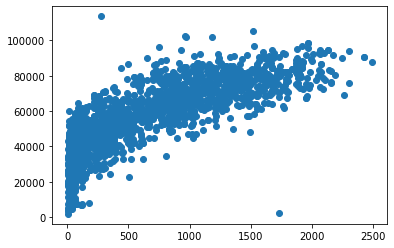

In [76]:
plt.scatter(df_ifood["expenses"], df_ifood["Income"])
plt.show()

In [77]:
df_ifood["expenses"].corr(df_ifood["Income"])

0.823066002139838

There is a strong correlation between higher incomes and higher expenses.